# GNB

In [1]:
import numpy as np
from numpy import linalg as LA
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [2]:
X,y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

def revamp(X):
    X_out = np.zeros(np.shape(X))
    for i in range(len(X)):
        for j in range(len(X[1])):
            value = X[i][j]
            if value < 5.0:
                X_out[i][j] = 0 #'DARK'
            elif value > 10.0:
                X_out[i][j] = 2 #'LIGHT'
            else:
                X_out[i][j] = 1 #'GRAY'
    return X_out
#Summerised into 0,1,2 aka DARK, LIGHT, GRAY
X_train_sum = revamp(X_train)
X_test_sum = revamp(X_test)

import MNIST
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')
train_features, test_features, train_labels, test_labels = mnist.get_data()

## Classifier

In [3]:
class GNB:
    def __init__(self, nbr_classes, size, value_len):
        self.nbr_classes = nbr_classes 
        self.size = size
        self.value_len = value_len
        self.prob = np.zeros(nbr_classes)
        self.mean = np.zeros((nbr_classes,size))
        self.var = np.zeros((nbr_classes,size))
        self.eps = 0.01
        self.subset = {}
        
        
    def fit(self, X, y):
        
        for idx, sample in enumerate(X):
            if str(y[idx]) in self.subset:
                self.subset[str(y[idx])].append(sample)
            else:
                self.subset[str(y[idx])] = [sample]
                             
        for i in range(self.nbr_classes):
            self.mean[i] = np.mean(self.subset[str(i)], axis=0)
            self.var[i] = np.var(self.subset[str(i)], axis=0) + self.eps
            self.prob[i] = len(self.subset[str(i)])/len(X)
            
    def prediction(self,X):
        y = np.ones((len(X),self.nbr_classes))
        pred = np.zeros(len(X))
        
        #X[i][k] pixel k in example i
        for i in range(len(X)): #example i
            for j in range(self.nbr_classes): #class j
                for k in range(len(X[1])): #pixel k 
                    y[i][j] *= np.exp(-np.square(X[i][k]-self.mean[j,k])/(2*self.var[j,k]))/np.sqrt(2*np.pi*self.var[j,k])
                y[i][j] *= self.prob[j]
                if np.max(y[i]) == 0:
                    pred[i] = 10
                else:
                    pred[i] = np.argmax(y[i])
        
        return pred           
          

## Digits

In [4]:
gnb_dig = GNB(10,len(X_train[1]),17)
gnb_dig.fit(X_train,y_train)
y_pred = gnb_dig.prediction(X_test) 

In [5]:
print("Classification report GNB digits:\n%s\n"
          % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix GNB digits:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report GNB digits:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        58
           1       0.96      0.81      0.88        53
           2       0.94      0.89      0.91        53
           3       0.88      0.85      0.86        52
           4       0.94      0.91      0.93        56
           5       0.95      0.85      0.90        62
           6       0.98      0.98      0.98        57
           7       0.83      0.98      0.90        53
           8       0.74      0.96      0.83        47
           9       0.78      0.82      0.80        49

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.89       540
weighted avg       0.90      0.90      0.90       540


Confusion matrix GNB digits:
[[53  0  0  0  2  1  0  1  0  1]
 [ 0 43  0  0  0  0  0  0  5  5]
 [ 0  1 47  0  0  0  0  0  4  1]
 [ 0  0  1 44  0  0  0  1  4  2]
 [ 0  0  0  0 51  0  0  4  1  0]
 [ 0  0  0  

## Digits summerised

In [6]:
gnb_dig2 = GNB(10,len(X_train_sum[1]),17)
gnb_dig2.fit(X_train_sum,y_train)
y_pred = gnb_dig2.prediction(X_test_sum)

In [7]:
print("Classification report GNB digits (summerised):\n%s\n"
          % (metrics.classification_report(y_test, y_pred)))
print("Confusion matrix GNB digits (summerised):\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report GNB digits (summerised):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.93      0.75      0.83        53
           2       0.88      0.92      0.90        53
           3       0.85      0.77      0.81        52
           4       0.94      0.91      0.93        56
           5       0.95      0.85      0.90        62
           6       0.98      0.96      0.97        57
           7       0.83      0.98      0.90        53
           8       0.75      0.87      0.80        47
           9       0.75      0.84      0.79        49

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.89      0.88      0.88       540


Confusion matrix GNB digits (summerised):
[[55  0  1  0  1  0  0  1  0  0]
 [ 0 40  0  0  0  0  0  0  5  8]
 [ 0  1 49  0  0  0  0  0  3  0]
 [ 0  0  5 40  0  0  0  1  3  3]
 [ 0  0  0  0 51  0

## MNIST_light

In [8]:
gnb_mnist = GNB(10,len(train_features[1]),255)
gnb_mnist.fit(train_features,train_labels)
pred_labels = gnb_mnist.prediction(test_features)

In [9]:
print("Classification report NBC MNIST_light:\n%s\n"
          % (metrics.classification_report(test_labels, pred_labels)))
print("Confusion matrix NBC MNIST_light:\n%s" % metrics.confusion_matrix(test_labels, pred_labels))


Classification report NBC MNIST_light:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       164
           1       0.76      0.97      0.85       152
           2       0.83      0.70      0.76       155
           3       0.76      0.74      0.75       154
           4       0.81      0.64      0.71       143
           5       0.93      0.67      0.78       141
           6       0.84      0.94      0.89       143
           7       0.96      0.81      0.88       158
           8       0.74      0.75      0.74       132
           9       0.66      0.88      0.75       158

    accuracy                           0.81      1500
   macro avg       0.82      0.80      0.80      1500
weighted avg       0.82      0.81      0.81      1500


Confusion matrix NBC MNIST_light:
[[156   0   1   0   0   1   2   0   3   1]
 [  0 148   0   0   0   1   1   0   2   0]
 [  1   6 109  11   1   1  13   1  12   0]
 [  0   6  15 114   1   0   2   2   9 

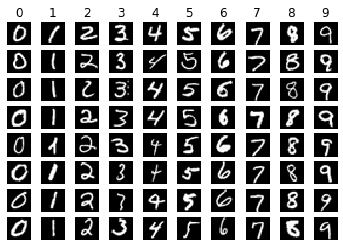

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

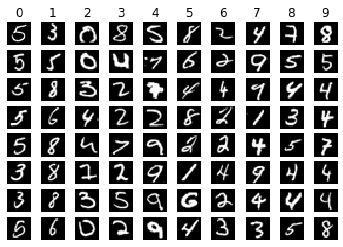

In [4]:
import MNIST
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

mnist = MNIST.MNISTData('MNIST_Light/*/*.png')

train_features, test_features, train_labels, test_labels = mnist.get_data()

mnist.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
          % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

mnist.visualize_wrong_class(y_pred, 8)